In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [5]:
X = D['X']
y = D['trueClass']

f1 = D['foldTrain']
f2 = D['foldTest']
y2 = y[f2]

X_8 = X[:, f2][:,y2==8][:, :252]
y_8= np.ones(252)*8

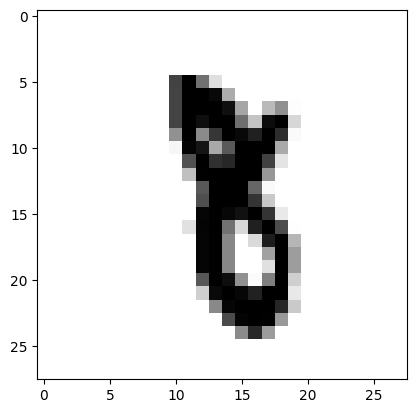

In [9]:
plt.imshow(X_8[:, 133].reshape(28,28), cmap='binary')

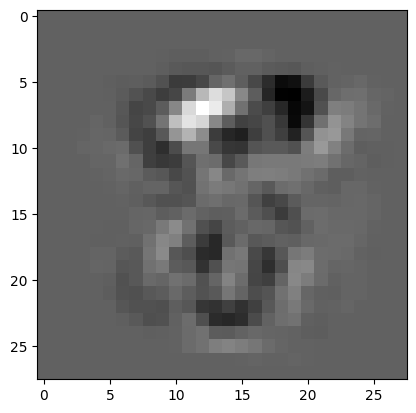

In [12]:
Cov = np.cov(X_8)
u, V = la.eig(Cov)
V = V.real
plt.imshow(V[:, 15].reshape(28,28), cmap='binary')

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.67).fit(X_8.T)
X_8p = pca.transform(X_8.T).T
X_8r = pca.inverse_transform(X_8p.T).T

16.227586535523486


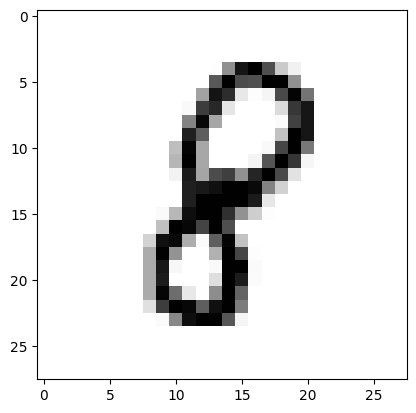

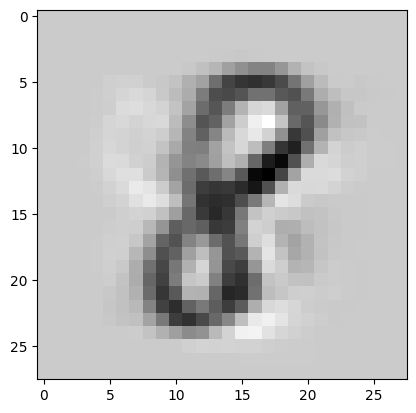

In [15]:
original = X_8[:, 87]
reconstructed = X_8r[:, 87]
plt.imshow(original.reshape(28,28), cmap='binary')
plt.figure()
plt.imshow(reconstructed.reshape(28,28), cmap='binary')

E = np.mean(np.abs(original - reconstructed))
print(E)

In [30]:
pca = PCA(n_components=60).fit(X_8.T)
X_8p = pca.transform(X_8.T).T
X_8r = pca.inverse_transform(X_8p.T).T

433


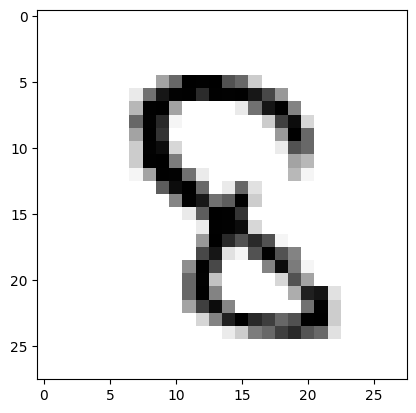

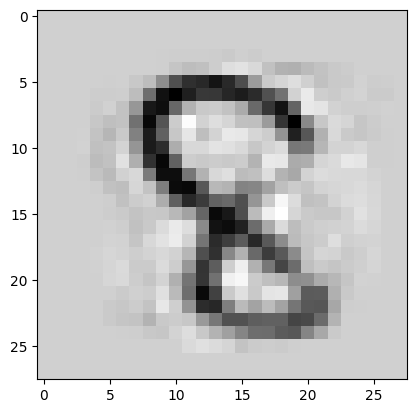

In [31]:
original = X_8[:, 115]
reconstructed = X_8r[:, 115]
plt.imshow(original.reshape(28,28), cmap='binary')
plt.figure()
plt.imshow(reconstructed.reshape(28,28), cmap='binary')

E = np.mean((original - reconstructed)**2)
print(round(E))

In [34]:
num_zeros = np.sum(np.diag(Cov)==0)
num_zeros

np.int64(302)

In [37]:
print(Cov.shape)
print(la.det(Cov))

(784, 784)
0.0


In [38]:
S = np.corrcoef(X_8)
print(round(S[458,569],2))

0.34


c:\Users\tomas\miniconda3\envs\AA\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\tomas\miniconda3\envs\AA\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
